<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/half_sphere_testing_2025_0329_1200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing plotting OP-13 output on half sphere
original


From: https://stackoverflow.com/questions/41105754/heat-map-half-sphere-plot


In [1]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

In [2]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

#Set mW m^-2 to yes or no based on aurora visibility threshold
#df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "[mW m^-2]"] = 1
#df_eflux.loc[df_eflux["[mW m^-2]"]<1, "[mW m^-2]"] = 0

#add column for visibility threshold (VT) T/F
df_eflux["VT"]= 0

#Set VT to 1 or 0 based on aurora visibility threshold of 1 mW m^-2
df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "VT"] = 1

df_eflux

,MLT,ML,[mW m^-2],VT
0,0.00,50.0,0.009205,0
1,0.00,50.5,0.009303,0
2,0.00,51.0,0.005775,0
3,0.00,51.5,0.020590,0
4,0.00,52.0,0.000387,0
...,...,...,...,...
7675,23.75,87.5,0.023140,0
7676,23.75,88.0,0.022190,0
7677,23.75,88.5,0.023080,0
7678,23.75,89.0,0.016270,0


(7680, 3)
[[0.         0.97429139 0.8867    ]
 [0.         0.99417489 0.4976    ]
 [0.         1.01405839 0.4575    ]
 [0.         1.03394189 0.07561   ]
 [0.         1.05382538 0.1537    ]
 [0.         1.07370888 0.6761    ]
 [0.         1.09359238 0.1659    ]
 [0.         1.11347588 0.09664   ]
 [0.         1.13335938 0.09386   ]
 [0.         1.15324287 0.02922   ]
 [0.         1.17312637 0.04782   ]]
(80, 96)
(80, 96)


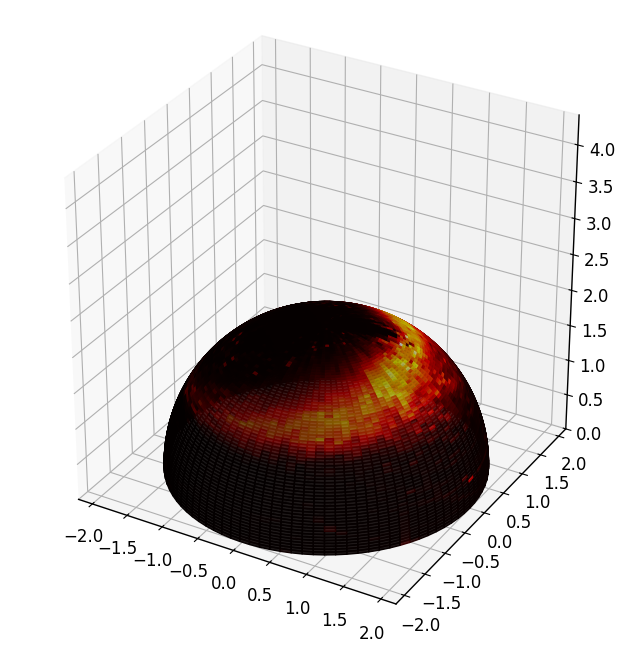

In [29]:
#theta inclination angle
#phi azimuthal angle
n_theta = 80 # number of values for theta (ML)
n_phi = 96  # number of values for phi (MLT)
r = 2        #radius of sphere

theta, phi = np.mgrid[0.0:0.5*np.pi:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

# mimic the input array
# array columns phi, theta, value
# first n_theta entries: phi=0, second n_theta entries: phi=0.0315..
inp = []
index = 0
for j in phi[0,:]:
    for i in theta[:,0]:
        val = df_eflux['[mW m^-2]'].iloc[index]# put something useful here
        inp.append([j, i, val])
        index += 1
inp = np.array(inp)
print(inp.shape)
print(inp[49:60, :])

#reshape the input array to the shape of the x,y,z arrays.
c = inp[:,2].reshape((n_phi,n_theta)).T
print(z.shape)
print(c.shape)


#Set colours and render
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#use facecolors argument, provide array of same shape as z
# cm.() allows to get rgba color from array.
# array must be normalized between 0 and 1
ax.plot_surface(
    x,y,z,  rstride=1, cstride=1, facecolors=cm.hot(c/c.max()), alpha=0.9, linewidth=1)
ax.set_xlim([-2.2,2.2])
ax.set_ylim([-2.2,2.2])
ax.set_zlim([0,4.4])
ax.set_aspect("equal")
#ax.plot_wireframe(x, y, z, color="k") #not needed?!
#plt.savefig(__file__+".png")
plt.show()

(7680, 3)
[[0.         0.59650493 0.8867    ]
 [0.         0.57662144 0.4976    ]
 [0.         0.55673794 0.4575    ]
 [0.         0.53685444 0.07561   ]
 [0.         0.51697094 0.1537    ]
 [0.         0.49708745 0.6761    ]
 [0.         0.47720395 0.1659    ]
 [0.         0.45732045 0.09664   ]
 [0.         0.43743695 0.09386   ]
 [0.         0.41755345 0.02922   ]
 [0.         0.39766996 0.04782   ]]
(80, 96)
(80, 96)


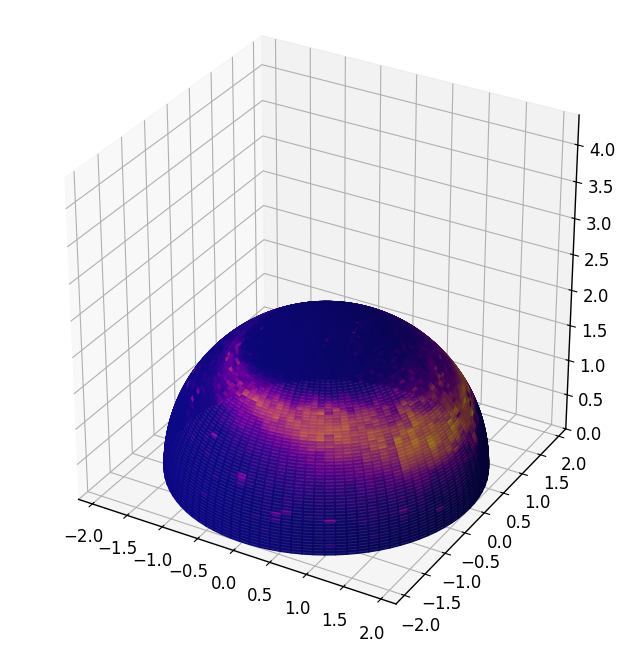

In [35]:
#theta inclination angle
#phi azimuthal angle
n_theta = 80 # number of values for theta (ML)
n_phi = 96  # number of values for phi (MLT)
r = 2        #radius of sphere

# Reversed range for theta since it was plotting backwards
theta, phi = np.mgrid[0.5*np.pi:0.0:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

# mimic the input array
# array columns phi, theta, value
# first n_theta entries: phi=0, second n_theta entries: phi=0.0315..
inp = []
index = 0
for j in phi[0,:]:
    for i in theta[:,0]:
        val = df_eflux['[mW m^-2]'].iloc[index]# put something useful here
        inp.append([j, i, val])
        index += 1
inp = np.array(inp)
print(inp.shape)
print(inp[49:60, :])

#reshape the input array to the shape of the x,y,z arrays.
c = inp[:,2].reshape((n_phi,n_theta)).T
print(z.shape)
print(c.shape)


#Set colours and render
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#use facecolors argument, provide array of same shape as z
# cm.() allows to get rgba color from array.
# array must be normalized between 0 and 1
ax.plot_surface(
    x,y,z,  rstride=1, cstride=1, facecolors=cm.plasma(c/c.max()), alpha=0.9, linewidth=1)
ax.set_xlim([-2.2,2.2])
ax.set_ylim([-2.2,2.2])
ax.set_zlim([0,4.4])
ax.set_aspect("equal")
#ax.plot_wireframe(x, y, z, color="k") #not needed?!
#plt.savefig(__file__+".png")
plt.show()